# Housing Market Analysis

The dataset below contains data ranging from the year 1995 to 2020 of each different area, 

It displays information regarding the monthly average house prices, the yearly number of homes sold, and the monthly number of crimes committed within the area.


In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
os.getcwd()

'/Users/denniscapili/Dropbox/Data_Analyst/Portfolio/London Housing/London Housing'

In [80]:
# Importing dataset
ldn_mthly = pd.read_csv('housing_in_london_monthly_variables.csv')
ldn_mthly
ldn_mthly_md = ldn_mthly
ldn_mthly_md

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,"64,605.00",NaN,0
13545,2019-10-01,england,249376,E92000001,"68,677.00",NaN,0
13546,2019-11-01,england,248515,E92000001,"67,814.00",NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [81]:
ldn_mthly_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [82]:
# Checking NULL values in columns
ldn_mthly_md.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [12]:
ldn_mthly_md.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


In [83]:
# Creating columns, First taking the null values and sorting from most to least
null_df_m = ldn_mthly_md.isnull().sum().sort_values(ascending = False)

# Second taking the NULL values sum and dividing by the amount of NULL values, sorting from most then multiplying by 100
percent = (ldn_mthly_md.isnull().sum() / ldn_mthly_md.isnull().count()).sort_values(ascending = False) * 100

# Concatenating the two columns together with keys as shown
null_df_m = pd.concat([null_df_m, percent], axis = 1, keys = ['Counts', '%Missing: '])

null_df_m.head()

,Counts,%Missing:
no_of_crimes,6110,45.10
houses_sold,94,0.69
date,0,0.00
area,0,0.00
average_price,0,0.00


ldn_mthly_md.drop[('no_of_crimes')]

In [84]:
ldn_mthly_md.drop(columns=['no_of_crimes'])

,date,area,average_price,code,houses_sold,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,1
1,1995-02-01,city of london,82203,E09000001,7.00,1
2,1995-03-01,city of london,79121,E09000001,14.00,1
3,1995-04-01,city of london,77101,E09000001,7.00,1
4,1995-05-01,city of london,84409,E09000001,10.00,1
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,"64,605.00",0
13545,2019-10-01,england,249376,E92000001,"68,677.00",0
13546,2019-11-01,england,248515,E92000001,"67,814.00",0
13547,2019-12-01,england,250410,E92000001,NaN,0


In [85]:
ldn_mthly_md['year'] = pd.DatetimeIndex(ldn_mthly_md['date']).year
ldn_mthly_md.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1,1995


In [86]:
# Since the information from the year 2020 wasn't completed we will only be using the data from 2019 and before
ldn_mthly_md = ldn_mthly_md[ldn_mthly_md['year'] < 2020]

## Exploring the Data

In [87]:
# A borough is a town or a district. In this dataset there are two different boroughs outlined therefore two 
# different cities so we will seperate them and conduct the analysis

# Amount of boroughs within London
ldn_mthly1 = ldn_mthly_md[ldn_mthly_md['borough_flag'] == 1 ]['area'].unique()
print('Amount of boroughs within London')
len(ldn_mthly1)

Amount of boroughs within London


33

In [88]:
list(ldn_mthly1)

['city of london',
 'barking and dagenham',
 'barnet',
 'bexley',
 'brent',
 'bromley',
 'camden',
 'croydon',
 'ealing',
 'enfield',
 'tower hamlets',
 'greenwich',
 'hackney',
 'hammersmith and fulham',
 'haringey',
 'harrow',
 'havering',
 'hillingdon',
 'hounslow',
 'islington',
 'kensington and chelsea',
 'kingston upon thames',
 'lambeth',
 'lewisham',
 'merton',
 'newham',
 'redbridge',
 'richmond upon thames',
 'southwark',
 'sutton',
 'waltham forest',
 'wandsworth',
 'westminster']

In [97]:
# Amount of borough outside of London
eng_mthly0 = ldn_mthly_md[ldn_mthly_md['borough_flag'] == 0 ]['area'].unique()
print('Amount of boroughs outside of London')
print(len(eng_mthly0))
eng_mthly0

Amount of boroughs outside of London
12


array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [98]:
# We have to manually add the regions specific to England, as there are some related to London
eng_regions = ['south west', 'south east', 'east of england', 'west midlands', 'east midlands', 'yorks and the humber', 'north west', 'north east']

In [104]:
ldn = ldn_mthly_md[ldn_mthly_md['area'].isin(len_mthly1)]
eng = ldn_mthly_md[ldn_mthly_md['area'].isin(eng_regions)]

In [74]:
#ldn = ldn_mthly_md[ldn_mthly_md['borough_flag'] == 1 ]
#eng = ldn_mthly_md[ldn_mthly_md['borough_flag'] == 0 ]

In [105]:
lnd_pr = ldn.groupby('date')['average_price'].mean()
eng_pr = eng.groupby('date')['average_price'].mean()

In [106]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('precision', 2)
font_size = 17

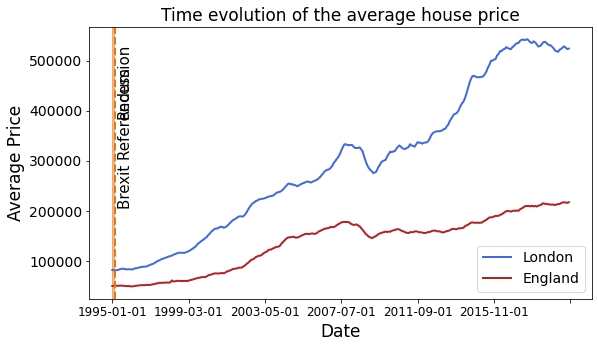

In [122]:
# Chart presenting differences in price over time in London and England 

Font_size = 17

plt.figure(figsize = (9, 5))

lnd_pr.plot(y = 'average_price', color = 'royalblue', lw = 2, label = 'London')
eng_pr.plot(y = 'average_price', color = 'firebrick', lw = 2, label = 'England')

plt.title('Time evolution of the average house price', size = font_size)
plt.ylabel('Average Price', size = font_size)
plt.xticks(size = font_size - 5)
plt.xlabel('Date', size = font_size)
plt.yticks(size = font_size - 3)
plt.legend(fontsize = font_size - 3);



### Top Areas in London

In [108]:
ldn_prices = Ldn.groupby('area')['average_price'].mean()
ldn_10 = lnd_prices.sort_values(ascending = False)
ldn_10.head(10)

area
kensington and chelsea   740,606.68
westminster              542,282.06
camden                   466,358.25
hammersmith and fulham   442,773.38
city of london           422,771.36
richmond upon thames     381,640.97
islington                364,160.28
wandsworth               341,411.03
barnet                   304,272.12
haringey                 292,017.11
Name: average_price, dtype: float64

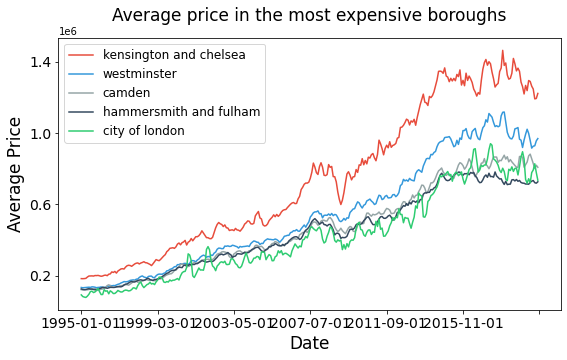

In [109]:
# Charting the values above
top5_indeces = ldn_10.head().index
colors = ['#e74c3c', '#3498db', '#95a5a6', '#34495e', '#2ecc71']

plt.figure(figsize = (9, 5))

for index, i in enumerate(top5_indeces):
    df_ = ldn[ldn['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    
    df_.plot(y = 'average_price', label = i, color = colors[index])
       
plt.title('Average price in the most expensive boroughs', y = 1.04, size = font_size)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([0.2*1E+6, 0.6*1E+6, 1.0*1E+6, 1.4*1E+6], size = font_size - 3)
plt.legend(fontsize = font_size - 5);


### Top Areas in England

In [110]:
#Grouping by area and sorting in terms of average price in descending order
eng_price = eng.groupby('area')['average_price'].mean()
eng_10 = eng_price.sort_values(ascending = False)
eng_10.head(10)


area
south east             195,653.01
east of england        170,796.17
south west             163,050.03
west midlands          126,857.76
east midlands          121,403.03
yorks and the humber   108,925.11
north west             108,602.98
north east              96,942.57
Name: average_price, dtype: float64

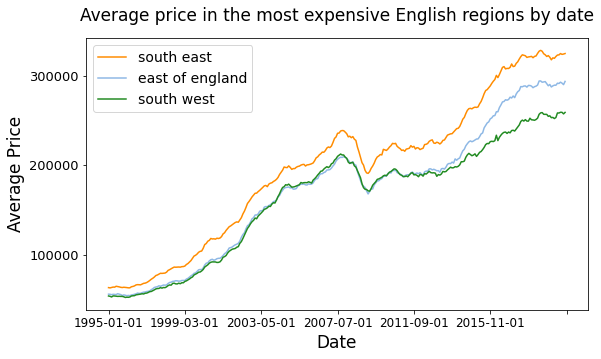

In [124]:
top3_indeces = eng_10.head(3).index
colors = ['darkorange', '#8EB8E5', 'forestgreen', ]

plt.figure(figsize = (9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y = 'average_price', label = i, color = colors[index])

plt.title('Average price in the most expensive English regions by date', size = font_size, y = 1.04)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 5)
plt.ylabel('Average Price', size = font_size)
plt.yticks([100_000, 200_000, 300_000], size = font_size - 4)
plt.legend(fontsize = font_size - 3);


### Homes Sold

In [120]:
# Home sold in London
lnd_sold = Ldn.groupby('date')['houses_sold'].sum()
lnd_sold

date
1995-01-01    7506.0
1995-02-01    6873.0
1995-03-01    9639.0
1995-04-01    8053.0
1995-05-01    9293.0
               ...  
2019-08-01    7749.0
2019-09-01    6475.0
2019-10-01    6802.0
2019-11-01    6433.0
2019-12-01       0.0
Name: houses_sold, Length: 300, dtype: float64

In [116]:
# Which area in London had the most sales
ldn_homes = Ldn.groupby('area')['houses_sold'].sum()
ldn_10 = ldn_homes.sort_values(ascending = False)
print('Top 5 Areas with Highest Sales')
ldn_10.head(5)

Top 5 Areas with Highest Sales


area
wandsworth   163,871.00
bromley      148,516.00
croydon      145,906.00
barnet       133,648.00
lambeth      117,953.00
Name: houses_sold, dtype: float64

In [121]:
eng_homes = eng.groupby('area')['houses_sold'].sum()
eng_10_homes = eng_homes.sort_values(ascending = False)
print('Top 5 Areas in England with Highest Home Sales')
eng_10_homes.head(5)

Top 5 Areas in England with Highest Home Sales


area
south east             4,195,116.00
north west             2,895,280.00
east of england        2,809,800.00
south west             2,639,661.00
yorks and the humber   2,183,762.00
Name: houses_sold, dtype: float64

# Conclusion
1. When comparing locations, within London and outside of London, you can see that the prices in homes rose siignificantly between 1999 and 2000 within London. While the prices outside of London steadily rose. This is due to the fact that with London being the capital it provided individuals with more job oppurtunities therefore more demand in homes.

2. The housing market crashed during the 2008 recession but started to steadily increase again in 2009, and then skyrocketed in 2012. 

3. The major areas within London that had the most sales were Wandsworth and Bromley, while the most expensive homes were in Kensington and Chelsea 
